In [124]:
import pandas as pd
import geopandas as gpd
import cbsodata
import numpy as np
import matplotlib.pyplot as plt

In [125]:
data_netherlands = pd.DataFrame(cbsodata.get_meta('85826NED', 'TypedDataSet'))

In [126]:


data_nl = data_netherlands[['ID', 'Persoonskenmerken', 'RegioS','Perioden','WerklozeBeroepsbevolking_12']]

data_nl = data_nl[data_nl['Perioden'] == '2020JJ00']
data_nl['Perioden'] = data_nl['Perioden'].str.extract(r'(\d{4})')

data_nl = data_nl[data_nl['Persoonskenmerken'] == 'T009002']

#data_nl.replace(0, np.nan, inplace=True)
#data_nl = data_nl.dropna()

data_nl


,ID,Persoonskenmerken,RegioS,Perioden,WerklozeBeroepsbevolking_12
7,7,T009002,NL01,2020,465.0
18,18,T009002,LD01,2020,47.0
29,29,T009002,LD02,2020,92.0
40,40,T009002,LD03,2020,232.0
51,51,T009002,LD04,2020,94.0
...,...,...,...,...,...
4737,4737,T009002,AM35,2020,3.0
4748,4748,T009002,AM36,2020,13.0
4759,4759,T009002,AM37,2020,10.0
4770,4770,T009002,AM38,2020,8.0


In [127]:
data_de = pd.read_csv("out/csvs/indicator_Arbeitslose.csv")

data_de = data_de[data_de['Zeitbezug'] == 2020]

data_de['Wert'] = data_de['Wert'] / 1000

#data_de.replace(0, np.nan, inplace=True)
data_de = data_de.dropna()

data_de

,Kennziffer,Wert,Zeitbezug
25,111,2695.456,2020
51,1,92.140,2020
77,2,80.677,2020
103,3,251.377,2020
129,4,40.823,2020
...,...,...,...
116428,16073000,3.111,2020
116454,16074000,1.984,2020
116480,16075000,2.090,2020
116506,16076000,2.590,2020


In [128]:
municipal_boundaries_nl = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:gemeente_gegeneraliseerd', engine="pyogrio")

municipal_boundaries_nl = municipal_boundaries_nl[['statcode', 'statnaam', 'geometry']]

municipal_boundaries_nl = pd.merge(municipal_boundaries_nl, data_nl,
                               left_on = "statcode", 
                               right_on = "RegioS")

municipal_boundaries_nl = municipal_boundaries_nl[['statcode', 'statnaam', 'geometry', 'RegioS', 'WerklozeBeroepsbevolking_12', 'Perioden' ]]

municipal_boundaries_nl.columns = ['Code', 'Name', 'geometry', 'Kennziffer', 'Wert', 'Zeitbezug']

municipal_boundaries_nl


,Code,Name,geometry,Kennziffer,Wert,Zeitbezug
0,GM0014,Groningen,"MULTIPOLYGON (((245194.691 592594.007, 245344....",GM0014,9.0,2020
1,GM0034,Almere,"MULTIPOLYGON (((146891.056 493291.709, 147422....",GM0034,7.0,2020
2,GM0037,Stadskanaal,"MULTIPOLYGON (((263763.866 566430.392, 263988....",GM0037,1.0,2020
3,GM0047,Veendam,"MULTIPOLYGON (((256231.909 572319.213, 258595....",GM0047,1.0,2020
4,GM0050,Zeewolde,"MULTIPOLYGON (((170596.293 486786.456, 170560....",GM0050,1.0,2020
...,...,...,...,...,...,...
333,GM1966,Het Hogeland,"MULTIPOLYGON (((215071.742 595253.084, 215169....",GM1966,1.0,2020
334,GM1969,Westerkwartier,"MULTIPOLYGON (((217623.770 592502.490, 217917....",GM1969,1.0,2020
335,GM1970,Noardeast-Fryslân,"MULTIPOLYGON (((207686.537 595425.623, 207640....",GM1970,1.0,2020
336,GM1978,Molenlanden,"MULTIPOLYGON (((123712.581 439998.364, 124188....",GM1978,1.0,2020


In [129]:
municipal_boundaries_de = gpd.read_file(filename='../data/DE_VG250.gpkg', layer="vg250_krs",engine="pyogrio")

municipal_boundaries_de['AGS_int'] = municipal_boundaries_de.AGS_0.astype(int)

municipal_boundaries_de = municipal_boundaries_de[municipal_boundaries_de['GF'] == 4]

municipal_boundaries_de = municipal_boundaries_de[['AGS_int', 'GEN', 'geometry']]

municipal_boundaries_de = pd.merge(municipal_boundaries_de, data_de,
                             left_on = "AGS_int", 
                              right_on = "Kennziffer")

municipal_boundaries_de.columns = ['Code', 'Name', 'geometry', 'Kennziffer', 'Wert', 'Zeitbezug']

municipal_boundaries_de



,Code,Name,geometry,Kennziffer,Wert,Zeitbezug
0,1001000,Flensburg,"MULTIPOLYGON (((526513.753 6075133.412, 526547...",1001000,4.722,2020
1,1002000,Kiel,"MULTIPOLYGON (((575841.569 6032148.032, 575869...",1002000,11.776,2020
2,1003000,Lübeck,"MULTIPOLYGON (((623056.151 5983746.445, 623191...",1003000,9.404,2020
3,1004000,Neumünster,"MULTIPOLYGON (((565015.652 6000637.513, 565128...",1004000,3.846,2020
4,1051000,Dithmarschen,"MULTIPOLYGON (((479877.791 5990290.587, 479947...",1051000,4.261,2020
...,...,...,...,...,...,...
395,16073000,Saalfeld-Rudolstadt,"MULTIPOLYGON (((659352.786 5633725.523, 659501...",16073000,3.111,2020
396,16074000,Saale-Holzland-Kreis,"MULTIPOLYGON (((688961.348 5662575.516, 688976...",16074000,1.984,2020
397,16075000,Saale-Orla-Kreis,"MULTIPOLYGON (((699461.667 5630277.321, 699499...",16075000,2.090,2020
398,16076000,Greiz,"MULTIPOLYGON (((724109.327 5650625.772, 724321...",16076000,2.590,2020


Text(0.5, 1.0, 'fisherjenks, 2020')

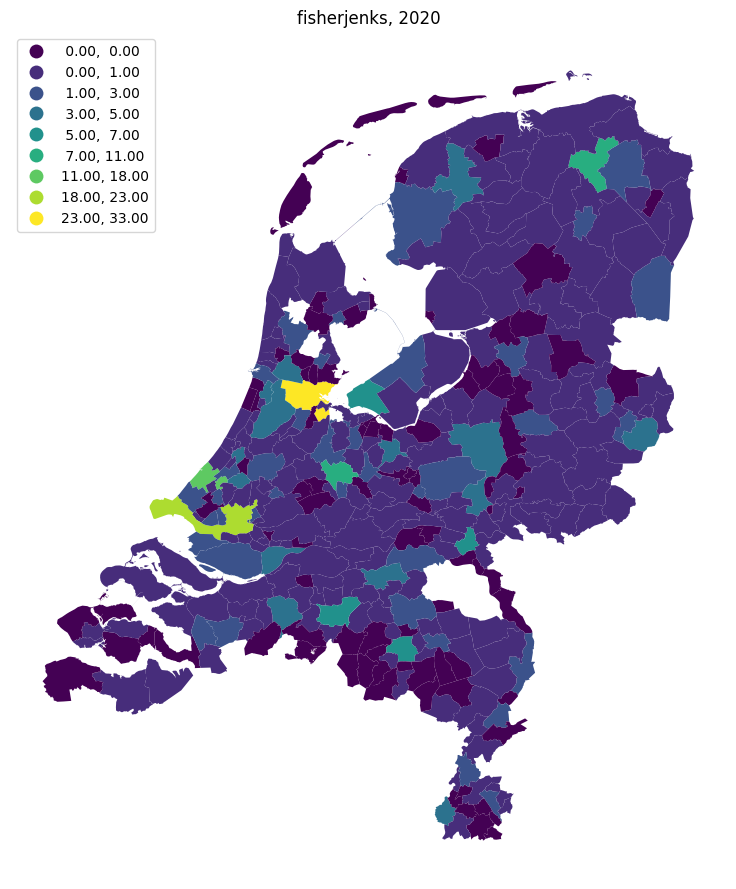

In [130]:
scheme = "fisherjenks"
year = municipal_boundaries_nl['Zeitbezug'][1]
p = municipal_boundaries_nl.plot(column='Wert',
                             scheme=scheme,
                             k=9,
                             legend=True,
                             legend_kwds={'loc': 'upper left'},
                             figsize = (11,11))
p.axis('off')
p.set_title(scheme + ', ' + year)

Text(0.5, 1.0, 'quantiles, 2020')

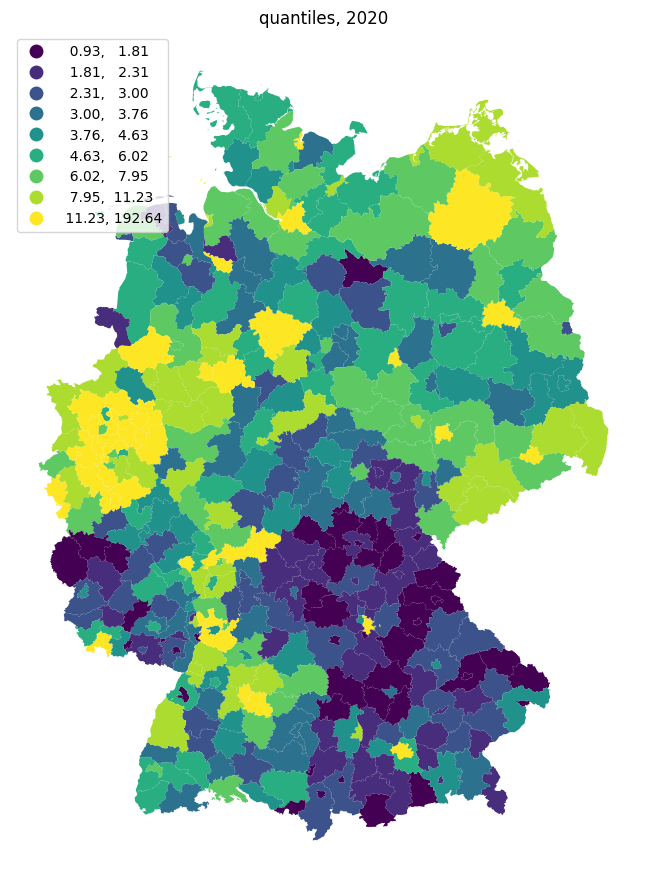

In [131]:
scheme = "quantiles"
year = municipal_boundaries_de['Zeitbezug'][1]
year = year.astype('str')
p = municipal_boundaries_de.plot(column='Wert',
                             scheme=scheme,
                             k=9,
                             legend=True,
                             legend_kwds={'loc': 'upper left'},
                             figsize = (11,11))
p.axis('off')
p.set_title(scheme + ', ' + year)

In [132]:
de = municipal_boundaries_de.to_crs('epsg:3035')
nl = municipal_boundaries_nl.to_crs('epsg:3035')

data_mixed = pd.concat([nl, de], ignore_index=True)

data_mixed


,Code,Name,geometry,Kennziffer,Wert,Zeitbezug
0,GM0014,Groningen,"MULTIPOLYGON (((4103810.729 3360893.031, 41039...",GM0014,9.000,2020
1,GM0034,Almere,"MULTIPOLYGON (((3999375.839 3268013.648, 39998...",GM0034,7.000,2020
2,GM0037,Stadskanaal,"MULTIPOLYGON (((4120663.331 3333600.459, 41208...",GM0037,1.000,2020
3,GM0047,Veendam,"MULTIPOLYGON (((4113524.608 3339956.737, 41158...",GM0047,1.000,2020
4,GM0050,Zeewolde,"MULTIPOLYGON (((4022614.611 3260017.421, 40225...",GM0050,1.000,2020
...,...,...,...,...,...,...
733,16073000,Saalfeld-Rudolstadt,"MULTIPOLYGON (((4409973.500 3080963.490, 44101...",16073000,3.111,2020
734,16074000,Saale-Holzland-Kreis,"MULTIPOLYGON (((4439969.466 3109415.347, 44399...",16074000,1.984,2020
735,16075000,Saale-Orla-Kreis,"MULTIPOLYGON (((4450032.187 3076981.042, 44500...",16075000,2.090,2020
736,16076000,Greiz,"MULTIPOLYGON (((4474946.993 3096997.500, 44751...",16076000,2.590,2020


Text(0.5, 1.0, 'equalinterval, 2020')

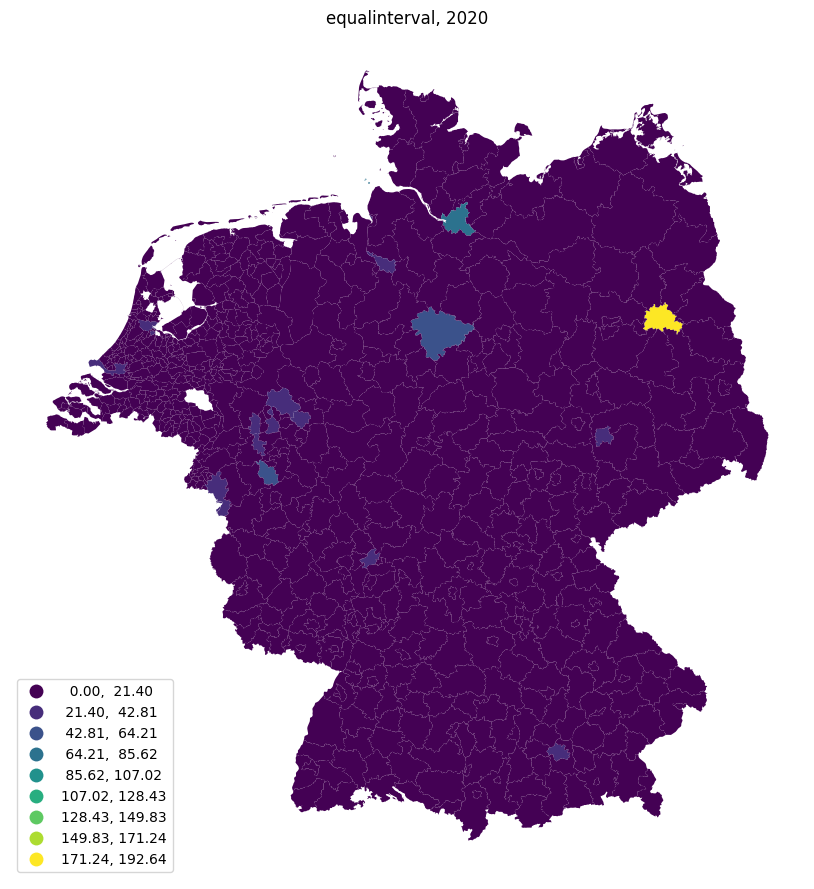

In [133]:
scheme = "equalinterval"
year = data_mixed['Zeitbezug'][1]
p = data_mixed.plot(column='Wert',
                             scheme=scheme,
                             k=9,
                             legend=True,
                             legend_kwds={'loc': 'lower left'},
                             figsize = (11,11))
p.axis('off')
p.set_title(scheme + ', ' + year)